# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

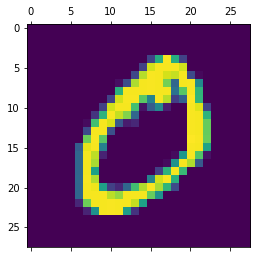

In [2]:
# (1 point) load train data, save class labels, plot first point as a digit
train_data = pd.read_csv('mnist.csv')
train_data.head()
small_data = train_data.iloc[:3000, 1:]
color = train_data['5'][:3000]

plt.matshow(small_data.iloc[0].values.reshape(28, -1))
plt.show()

In [1]:
28 * 28

784

In [3]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment,
# Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding

# (1) (5 points) apply methods to reduce dimension to two
# (2) (3 points) plot results where the different digits are represented with different styles/colors
# (3) (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (4) (1 point) make a conclusion

In [51]:
# IsoMap
import sklearn.manifold

model = sklearn.manifold.Isomap(n_neighbors=15, n_components=2)
model.fit(small_data)


Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=15, neighbors_algorithm='auto', path_method='auto', tol=0)

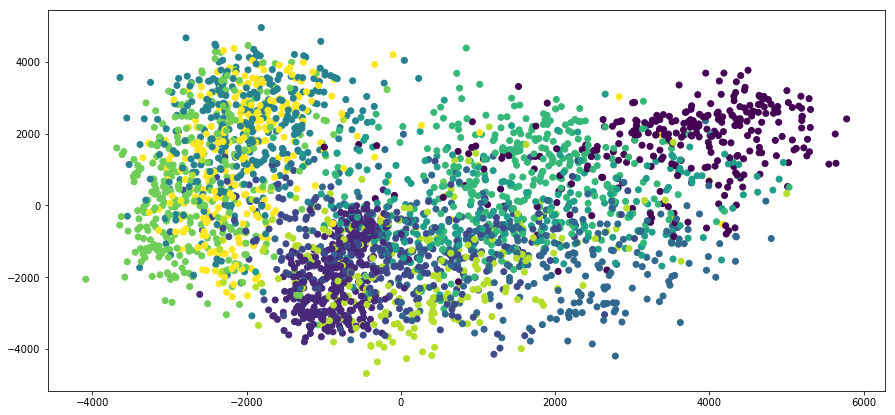

In [93]:
transformed_data = model.transform(small_data)
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data), c=color)

In [122]:
new_point = train_data.iloc[3003, 1:]
value_new_point = train_data.iloc[3003, 0]

1


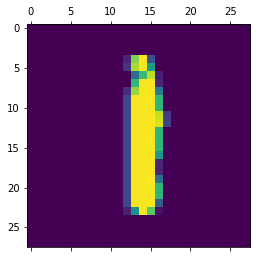

In [123]:
print(value_new_point)
plt.matshow(new_point.values.reshape(28, -1))

In [124]:
transformed_new_point = model.transform([new_point])
print(transformed_new_point)

[[-625.49123363 -956.10204095]]


In [126]:
transformed_data_with_new_point = np.vstack((transformed_data, transformed_new_point))
color = np.array(color)
transformed_data_with_new_point.shape

(3001, 2)

In [127]:
new_color = np.hstack((color, np.array([12])))

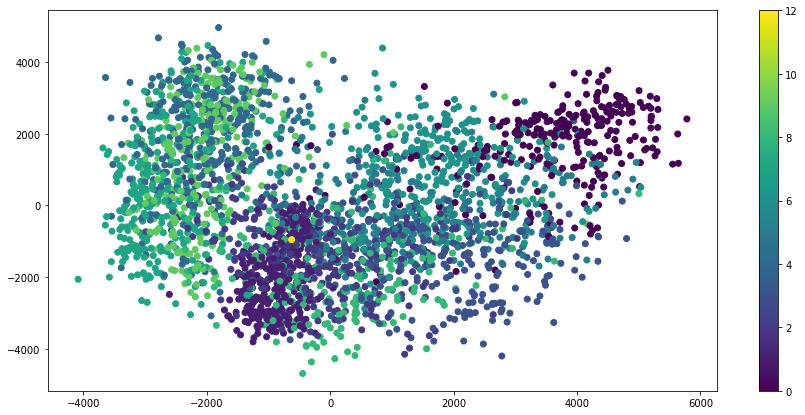

In [128]:
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data_with_new_point), c=new_color, cmap='viridis')

# Наша новая точка обозначена желтым цветом. Мы видим, что она близка точкам темно-фиолетового цвета,
# которые обазначают цифру один. Следовательно результат совпадает с обучающей выборке.
plt.colorbar()
plt.show()

In [36]:
# Spectral Embedding


In [7]:
se_model = sklearn.manifold.SpectralEmbedding(n_components=2,
                                              n_neighbors=20)
se_model.fit(small_data)
transformed_data = se_model.fit_transform(small_data)

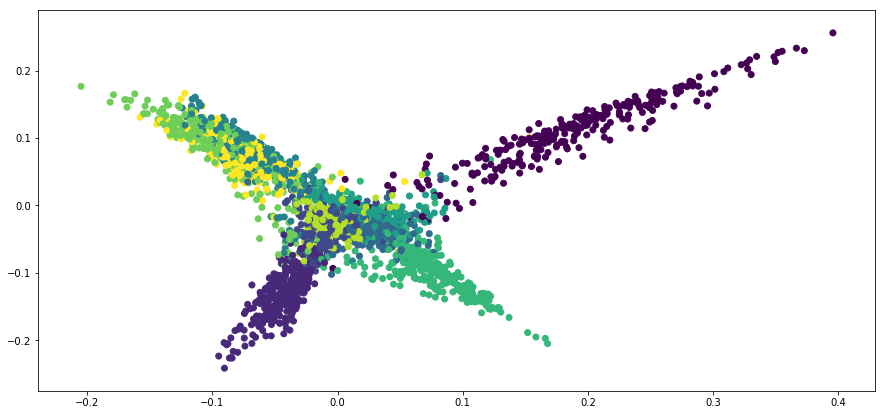

In [8]:
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data), c=color)

In [9]:
# LTSA

ltsa_model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2,
                                                     method='ltsa', eigen_solver='dense')

ltsa_model.fit(small_data)
transformed_data = ltsa_model.fit_transform(small_data)

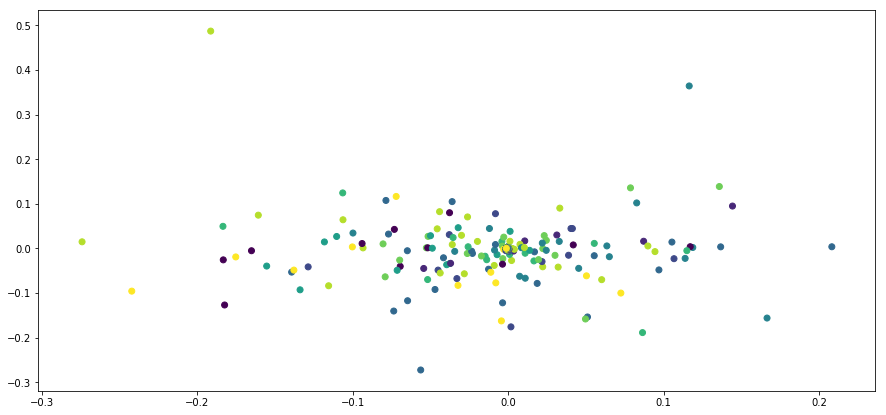

In [10]:
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data), c=color)

In [11]:
# MDS
mds_model = sklearn.manifold.MDS(n_components=2, max_iter=100)

mds_model.fit(small_data)
transformed_data = mds_model.fit_transform(small_data)


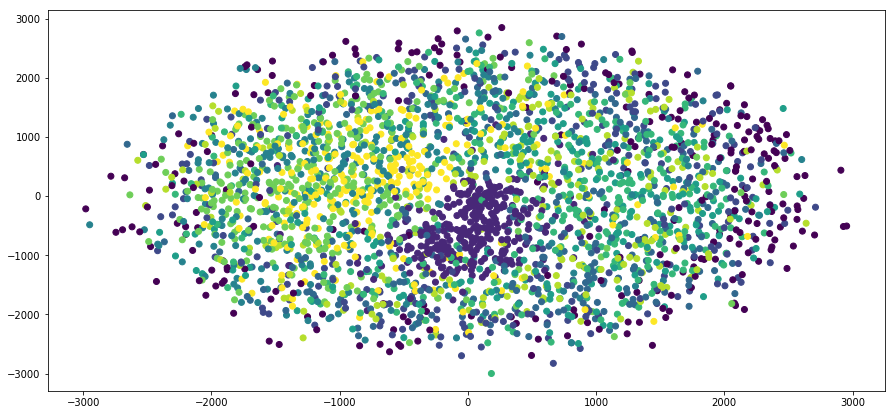

In [12]:
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data), c=color)

In [13]:
# t-SNE

tsne_model = sklearn.manifold.TSNE(n_components=2, init='pca', random_state=1)

tsne_model.fit(small_data)
transformed_data = tsne_model.fit_transform(small_data)

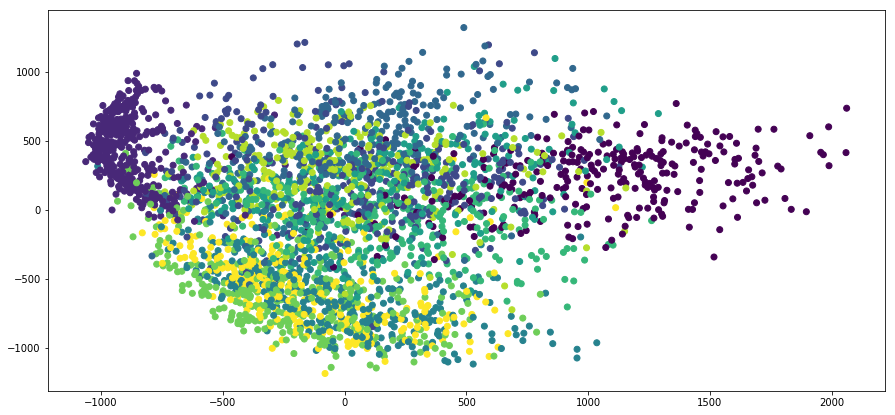

In [14]:
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data), c=color)

In [5]:
sklearn.manifold.TSNE?

In [33]:
# t-SNE
tsne_model = sklearn.manifold.TSNE(n_components=2, random_state=1)

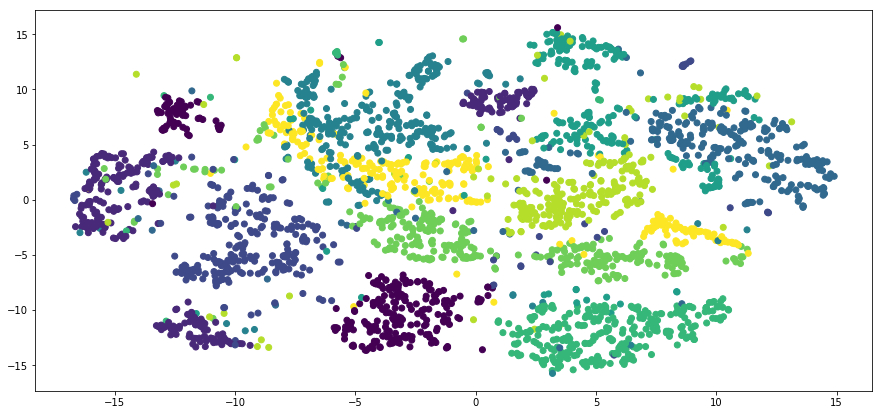

In [34]:
# second attempt of applying t-SNE
tsne_model.fit(small_data)
transformed_data = tsne_model.fit_transform(small_data)
plt.figure(figsize=(15, 7))
plt.scatter(*zip(*transformed_data), c=color)